# Aula 52 - (13/10/2025) RNNS E NLP

## Parte 1 - Imagens

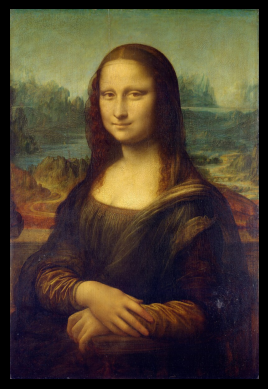

In [1]:
# pip install opencv-python
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
img = cv2.imread('lisa.jpg')

# Display da imagem
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Desativar os eixos
plt.show()


In [2]:
def display_img(img):
    plt.imshow(img)
    plt.axis('off')  # Desativar os eixos
    plt.show()

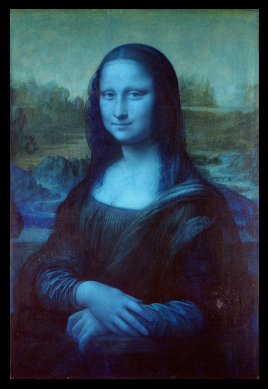

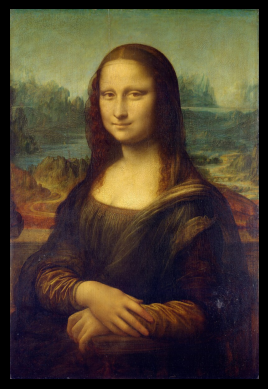

In [3]:
display_img(img)
display_img(img_rgb)

In [4]:
print(img_rgb) # Matriz de pixels

[[[110 120  93]
  [ 83  93  68]
  [ 82  91  70]
  ...
  [128 128 116]
  [112 109 104]
  [ 90  86  83]]

 [[111 121  94]
  [119 129 104]
  [111 120  99]
  ...
  [ 80  80  68]
  [ 86  83  76]
  [ 94  91  86]]

 [[ 97 110  82]
  [104 117  91]
  [ 76  85  64]
  ...
  [ 84  85  71]
  [ 67  64  55]
  [ 43  40  33]]

 ...

 [[123 115 128]
  [ 83  75  88]
  [ 82  76  90]
  ...
  [150 143 161]
  [ 99  90 107]
  [ 46  37  54]]

 [[147 139 150]
  [ 59  51  64]
  [ 72  66  80]
  ...
  [ 26  19  37]
  [ 46  37  54]
  [ 20  11  28]]

 [[109 101 112]
  [ 64  56  67]
  [ 55  49  63]
  ...
  [ 67  60  78]
  [ 57  48  65]
  [139 130 147]]]


In [5]:
print(len(img_rgb)) # Altura da imagem
print(len(img_rgb[0])) # Largura da imagem
print(len(img_rgb[0][0])) # Canais de cor

1192
800
3


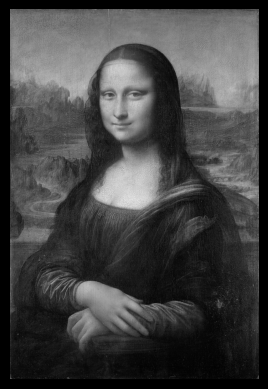

In [6]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converter para escala de cinza
plt.imshow(cinza, cmap='gray')
plt.axis('off')  # Desativar os eixos
plt.show()


In [7]:
print(cinza, "\n")

print(len(cinza)) # Altura da imagem
print(len(cinza[0])) # Largura da imagem

[[114  87  86 ... 127 109  87]
 [115 123 115 ...  79  83  91]
 [103 110  80 ...  83  64  40]
 ...
 [119  79  79 ... 147  95  42]
 [143  55  69 ...  23  42  16]
 [105  60  52 ...  64  53 135]] 

1192
800


## Parte 2 - Rede Neural Simples

In [22]:
# pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [28]:
# Dados de Entrada
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
], dtype=float)

# Saida Esperada
y = np.array([
    [0],
    [1],
    [1],
    [1]
], dtype=float)

# Criar o modelo de rede neural simples
modelo = models.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(2,)) # Camada de entrada e saída que vão ter 2 neurônios de entrada e 1 de saída
])

# Modelo sequencial com uma camada
# 1 é o número de neurônios na camada
# sigmoid é a minha função de ativação
# imput_shape define a minha estrutura da entrada (2 neurônios de entrada)

# Compilando o modelo com os paramentos de treinamento.
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
modelo.fit(X, y, epochs=500, verbose=0)

# Salvando o modelo em arquivo para uso futuro
modelo.save('modelo_simples_Alan_Diek.h5')

# Avaliando o modelo


In [29]:
modelo.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [ ]:
for i, layer in enumerate(modelo.layers):
    pesos, bias = layer.get_weights()
    print(f"Camada {i+1}:")
    print(f"Pesos:\n{pesos}")
    print(f"Bias:\n{bias}")

Camada 1:
Pesos:
[[1.1067592 ]
 [0.21006292]]
Bias:
[0.341447]


In [37]:
from tensorflow.keras.models import load_model

# Carregando o modelo salvo
modelo_carregado = load_model('modelo_simples_Alan_Diek.h5')

In [40]:
# testando o modelo carregado
teste = np.array(
    [[0,1]]
)

predicao = modelo_carregado.predict(teste)
print(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.63448584]]


In [41]:
predicao2 = modelo_carregado.predict(np.array(X))
print(X)
print(predicao2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.584542  ]
 [0.63448584]
 [0.8097222 ]
 [0.8400055 ]]


## Parte 3 - Exemplo de rede Neural

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [62]:
# Gerar dados de exemplo
np.random.seed(0)
X_class0 = np.random.randn(100, 2) + np.array([-2, -2])
X_class1 = np.random.randn(100, 2) + np.array([2, 2])
# cria a classe e adiciona um valor positivo ou negativo para separar os elementos com 2 classes distintas.

# Definindos os valores de entrada e saída.
X = np.vstack([X_class0, X_class1])             # vstack está empilhando verticalmente (um embaixo do outro)
y = np.hstack([np.zeros(100), np.ones(100)])    # hstack está empilhando horizontalmente (um do lado do outro)
# Zeros cria um vetor com 100 elementos com valor 0
# Ones cria um vetor com 100 elementos com valor 1

# Definindo o meu modelo
modelo_primeiro = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(2,)), # Camada oculta com 8 neurônios e função de ativação ReLU
    layers.Dense(1, activation='sigmoid')                 # Camada de saída com 1 neurônio e função de ativação Sigmoid
])
modelo_primeiro.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
resultado1 = modelo_primeiro.fit(X, y, epochs=50, verbose=0)

# Avaliando o modelo
loss, acc = modelo_primeiro.evaluate(X, y, verbose=0)

print(f"Acurácia do modelo: {acc*100:.2f}%")




c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Acurácia do modelo: 99.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


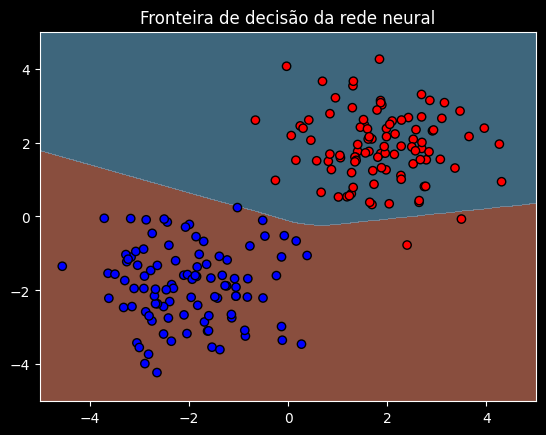

In [ ]:
import matplotlib.pyplot as plt

# Visualizar fronteira de decisão
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))  # Cria uma grade de pontos no espaço 2D
grid = np.c_[xx.ravel(), yy.ravel()]                                    # Combina os pontos em uma matriz de coordenadas
preds = modelo_primeiro.predict(grid).reshape(xx.shape)                 # Faz previsões para cada ponto na grade e reformata para a forma da grade


# Plotagem dos dados e da fronteira de decisão
plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6) # Desenha a fronteira de decisão
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolor="k")             # Plota os pontos de dados originais
plt.title("Fronteira de decisão da rede neural")                        # Título do gráfico
plt.show()


In [64]:
modelo_primeiro.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (408.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68 (276.00 B)